In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [2]:
toyota_data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
toyota_data = toyota_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
toyota_data.shape

(1436, 9)

In [7]:
toyota_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


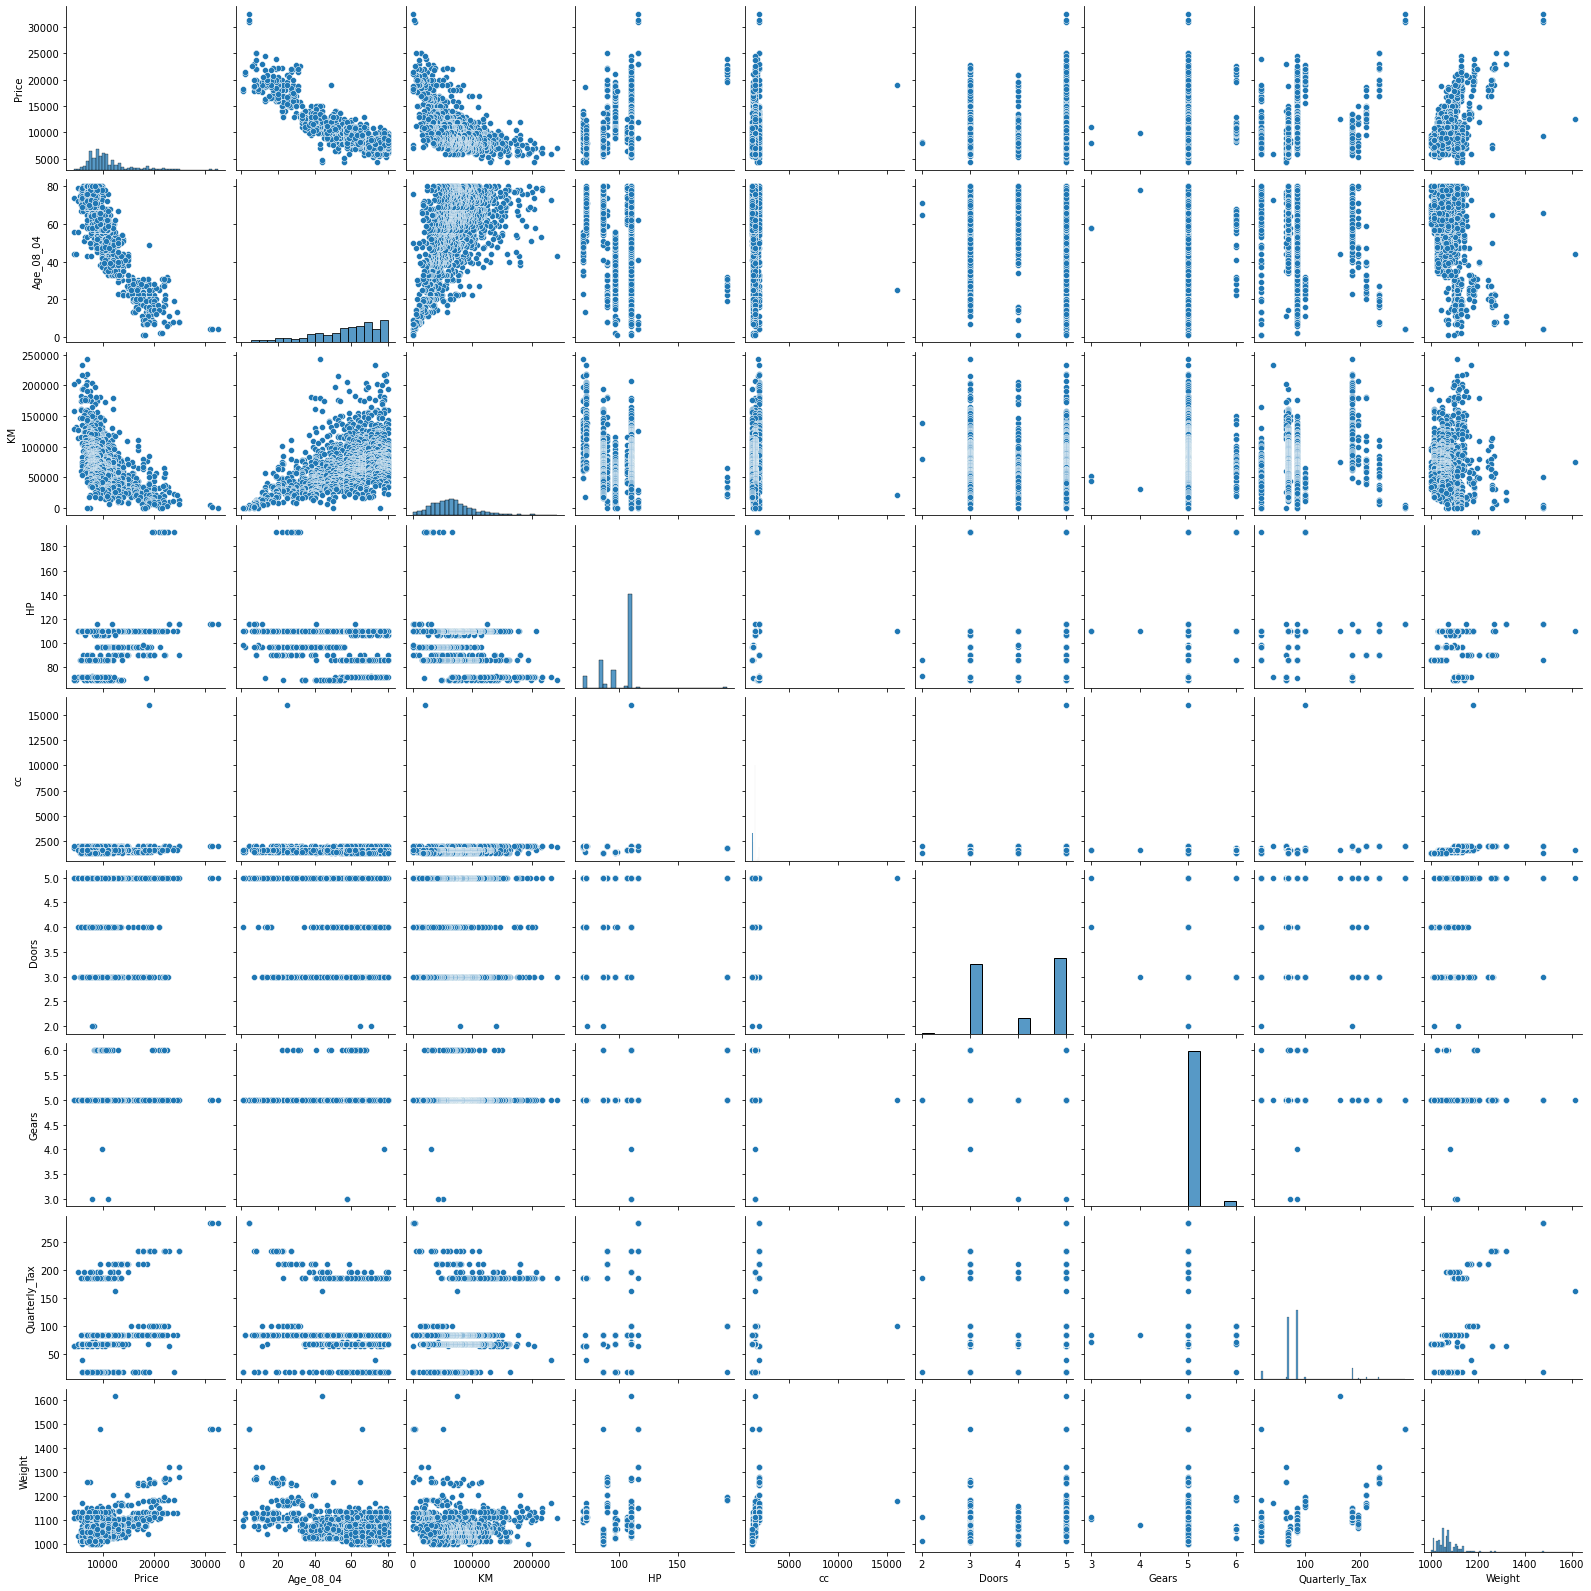

In [9]:
sns.pairplot(toyota_data)
plt.show()

In [10]:
corr_matrix= toyota_data.corr()
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


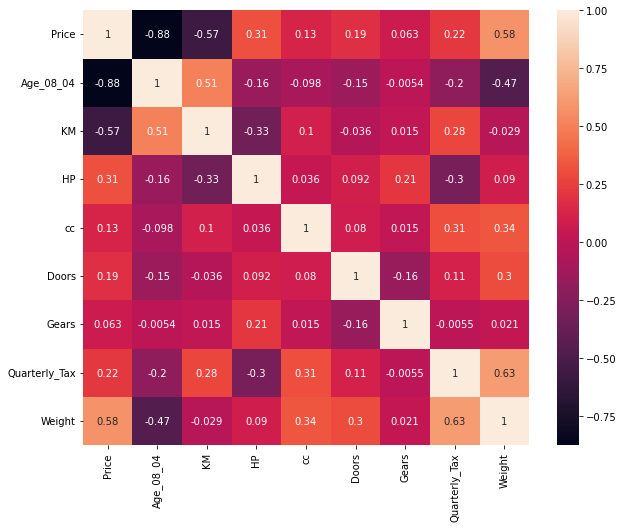

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [12]:
model = sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',toyota_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:54:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [14]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

Prediction model is,
### Price = -5573.10 + -121.65 * Age_08_04 +  -0.020 * KM + 31.68 * HP+  -0.12 * cc + -1.61* Doors + 594.32 *Gears +  3.95 * Quarterly_Tax + 16.958632 * Weight



### Finding the influential points using Cook's Distance

In [15]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

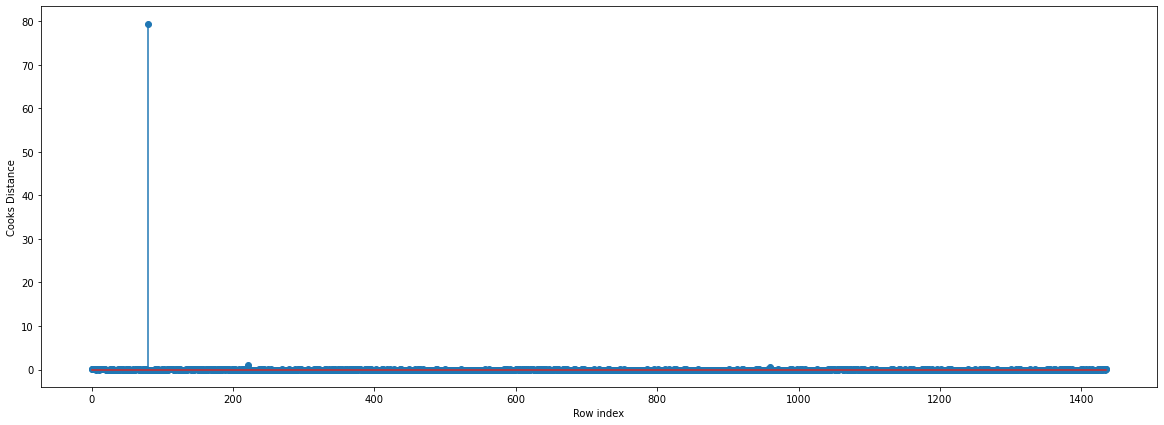

In [17]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [18]:
np.argmax(c),np.max(c)

(80, 79.52010624138717)

#### Record at index position 80 is  an influence point

In [19]:
# Droping the influence point
toyota_data_new = toyota_data.drop(toyota_data.index[80],axis = 0).reset_index(drop=1)
toyota_data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [20]:
model_1 = sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',toyota_data_new).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:56:34   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_influence = model_1.get_influence()
(c,_) = model_influence.cooks_distance

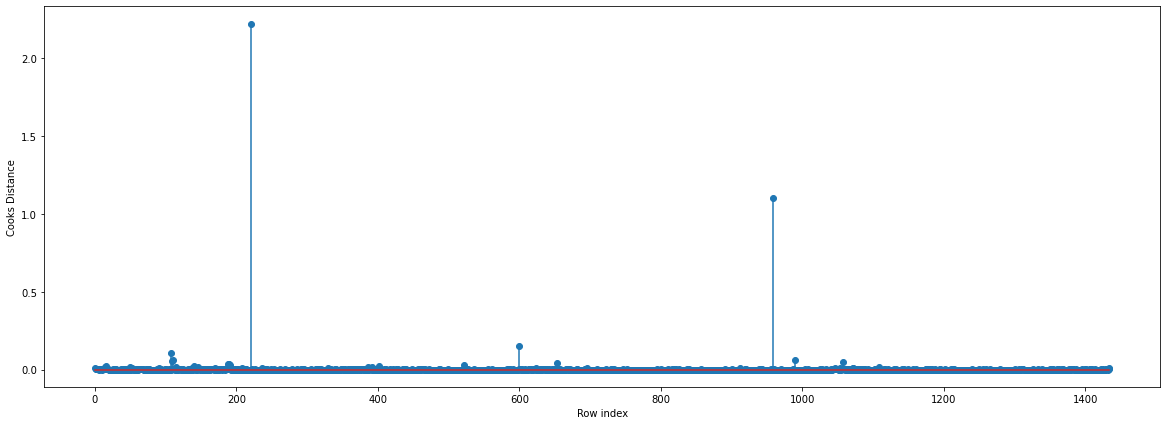

In [22]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
np.argmax(c)

220

#### Record at index position 220 is  an influence point

In [24]:
# Droping influence point
toyota_data_new_1 = toyota_data_new.drop(toyota_data_new.index[220]).reset_index(drop=1)
toyota_data_new_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [25]:
model_2 = sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',toyota_data_new_1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:58:12   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_influence = model_2.get_influence()
(c,_) = model_influence.cooks_distance

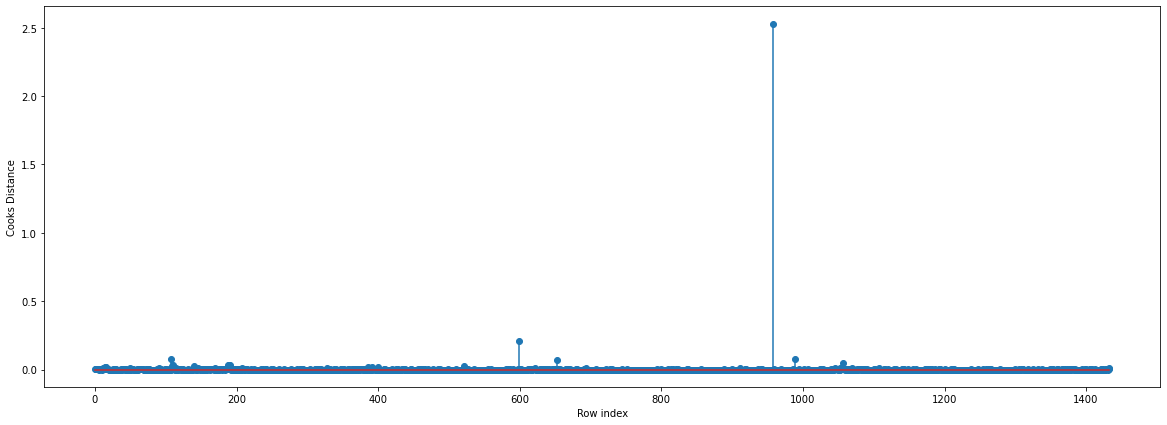

In [27]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data_new_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
np.argmax(c)

958

#### Record at index position 958 is  an influence point

In [29]:
toyota_data_new_2 = toyota_data_new_1.drop(toyota_data_new_1.index[958]).reset_index(drop=1)
toyota_data_new_2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


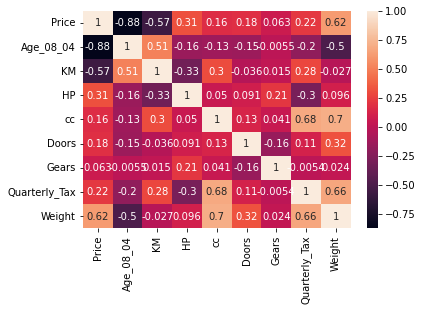

In [30]:
corr_matrix = toyota_data_new_2.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [31]:
model_3 = sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',toyota_data_new_2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:00:06   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model_3.params

Intercept       -14743.311719
Age_08_04         -112.018007
KM                  -0.016992
HP                  36.608402
cc                  -3.795426
Doors             -122.543739
Gears              464.983862
Quarterly_Tax        5.213440
Weight              30.639784
dtype: float64

In [33]:
X = toyota_data_new_2.drop('Price',axis=1)
y = toyota_data_new_2['Price']

In [34]:
std = StandardScaler()
std_val = std.fit_transform(X)
X_scale = pd.DataFrame(std_val,columns=X.columns)
X_scale

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.773494,-0.575606,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
1,-1.773494,0.116282,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
2,-1.719703,-0.716245,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
3,-1.612121,-0.548572,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
4,-1.396956,-0.801855,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.987542
...,...,...,...,...,...,...,...,...
1428,0.700899,-1.280586,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-0.944877
1429,0.862273,-1.321751,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1430,0.808482,-1.374647,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1431,0.754690,-1.377313,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.20,shuffle=True)

In [36]:
model = LinearRegression()
linear_model_1 = model.fit(X_train,y_train)

In [37]:
y_pred_train_1 = linear_model_1.predict(X_train)
y_pred_train_1

array([ 6425.35720086,  8806.21254409, 12270.46101211, ...,
       10768.02260347,  9840.79287258, 12472.62990273])

In [38]:
error_train = y_train - y_pred_train_1
error_train

1208    1824.642799
976      -56.212544
365     -320.461012
854      357.409395
1373    -754.545688
           ...     
1302     871.243123
546      603.984408
488      181.977397
1033    -890.792873
597      477.370097
Name: Price, Length: 1146, dtype: float64

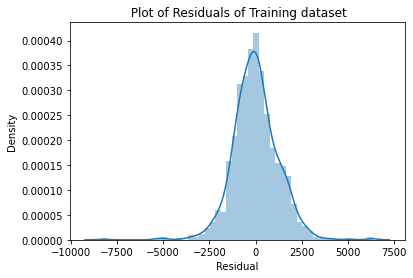

In [39]:
sns.distplot(error_train)
plt.title(' Plot of Residuals of Training dataset')
plt.xlabel('Residual')
plt.show()

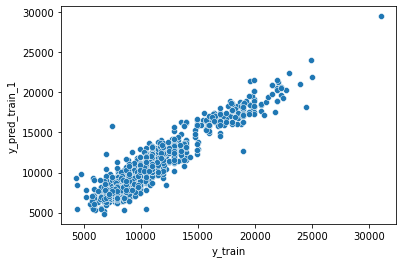

In [40]:
sns.scatterplot(y_train,y_pred_train_1)
plt.xlabel('y_train')
plt.ylabel('y_pred_train_1')
plt.show()

### Training MAPE

In [41]:
mape_train = mean_absolute_percentage_error(y_train,y_pred_train_1)
mape_train

0.09103891163928325

In [42]:
y_pred_test_1 = linear_model_1.predict(X_test)
error_test = y_test - y_pred_test_1

### Testing MAPE

In [43]:
mape_test = mean_absolute_percentage_error(y_test,y_pred_test_1)

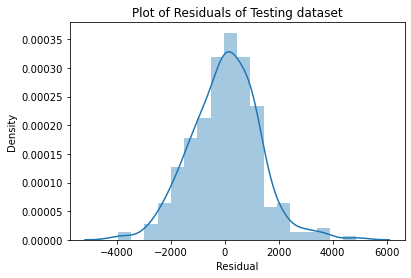

In [44]:
sns.distplot(error_test)
plt.title('Plot of Residuals of Testing dataset')
plt.xlabel('Residual')
plt.show()

In [45]:
X_scale

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.773494,-0.575606,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
1,-1.773494,0.116282,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
2,-1.719703,-0.716245,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
3,-1.612121,-0.548572,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
4,-1.396956,-0.801855,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.987542
...,...,...,...,...,...,...,...,...
1428,0.700899,-1.280586,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-0.944877
1429,0.862273,-1.321751,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1430,0.808482,-1.374647,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1431,0.754690,-1.377313,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113


In [46]:
y = pd.DataFrame(y)

In [47]:
df = pd.concat([X_scale,y],axis=1,join='outer')
df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,-1.773494,-0.575606,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424,13500
1,-1.773494,0.116282,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424,13750
2,-1.719703,-0.716245,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424,13950
3,-1.612121,-0.548572,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424,14950
4,-1.396956,-0.801855,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.987542,13750
...,...,...,...,...,...,...,...,...,...
1428,0.700899,-1.280586,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-0.944877,7500
1429,0.862273,-1.321751,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113,10845
1430,0.808482,-1.374647,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113,8500
1431,0.754690,-1.377313,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113,7250


In [48]:
model_4 = sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:02:14   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.072e+04     32.528    329.711      0.000    1.07e+04    1.08e+04
Age_08_04     -2082.4609     46.087    -45.185      0.000   -2172.867   -1992.055
KM             -637.3092     45.008    -14.160      0.000    -725.599    -549.020
HP              548.4881     41.133     13.334      0.000     467.800     629.176
cc             -710.4134     56.554    -12.562      0.000    -821.352    -599.475
Doors          -116.6942     35.691     -3.270      0.001    -186.707     -46.681
Gears            87.7137     34.139      2.569      0.010      20.745     154.682
Quarterly_Tax   214.1037     56.318      3.802      0.000     103.628     324.580
Weight         1515.0525     63.797     23.748      0.000    1389.906    1640.199
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model_4.params

Intercept        10724.824843
Age_08_04        -2082.460931
KM                -637.309198
HP                 548.488062
cc                -710.413389
Doors             -116.694191
Gears               87.713651
Quarterly_Tax      214.103704
Weight            1515.052460
dtype: float64

In [50]:
model_4.resid

0      -2833.273814
1      -2142.326850
2      -2360.886081
3      -1029.990390
4      -2096.536733
           ...     
1428   -1615.435074
1429    2345.781883
1430    -144.947302
1431   -1508.664462
1432   -3691.521002
Length: 1433, dtype: float64

### Distribution of Residuals

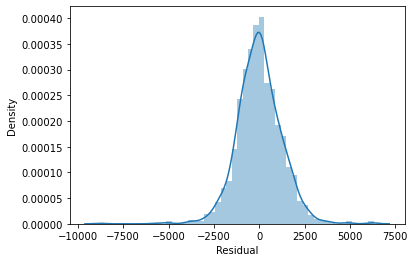

In [51]:
sns.distplot(model_4.resid)
plt.xlabel('Residual')
plt.show()

## Residual Plot for Homoscedasticity

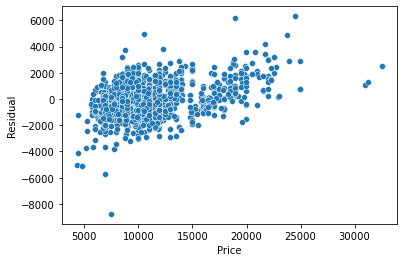

In [52]:
sns.scatterplot(df['Price'],model_4.resid,data=df)
plt.ylabel('Residual')
plt.show()

The residuals of the model follows normal distribution with constant variace

The prediction model is,
#### Price = 10724.82 + -2082.46 * Age_08_04 + -637.31 * KM +  548.45 * HP + -710.41 * cc + -116.69 * Doors +  87.71 * Gears + 214.10 * Quarterly_Tax + 1515.05 * Weight